<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center><font color=#555555><font size=6> Ingeniería Financiera </font> <br> <br>

<center><font color=#555555><font size=5> ITE1731 - Microestructura y Sistemas de Trading </font> <br> <br> <br>

<center><font color=#555555><font size=5> I.F. Luz Clara Epinosa Collazo </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Septiembre 2020 </a> | <font color= #555555> <font size = 4> Repositorio: <a href='https://github.com/'>https://github.com/luzifi/myst_if708591_lab1</a></font>

<br>

---

<br>

<br>

<center> <font color= #555555> <font size = 7> Laboratorio 1 </font> <br> <br> <font color= #555555> <font size = 5> Inversión del Capital </font>

# <font color= #555555> <font size = 5> Abstract </font>

<font color= #6B6B6B> <font size = 2> Este documento fue elaborado por tu **Luz Clara Epinosa Collazo**, como un trabajo parcial para la materia de **Microestructura y Sistemas de Trading - ITE1731**, la cual es parte del curriculum de la licenciatura en Ingeniería Financiera, ofertada por la universidad **ITESO**. En el presente trabajo se plantea la respuesta a la siguiente pregutna: *¿Qué estrategia de inversión propondrías si tu trabajo fuera administrar 1 Millón de pesos?*</font>

<br>

# <font color= #6B6B6B> <font size = 6> 0. Librerías y Dependencias </font>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> <font size = 5> 0.1 Librerías </font> <font color= #555555>

Para correr este notebook es necesario tener instaladas y/o en el archivo _requirements.txt_ las siguientes librerías :

- pandas>=1.1.1 
    * Libreria para manipulación y análisis de datos 
- numpy>=1.19.1
    * Libreria de funciones matemáticas para opereciones con vectores y matrices.
- jupyter>=1.0.0
    * Desallorrador de software abierto.
- yfinance>=0.1.54
    * Libreria para descargar datos históricos del mercado de Yahoo! Finanzas.

# <font color= #6B6B6B> <font size = 5> 0.2 Dependencias </font> <font color= #555555>

Para correr este notebook es necesario contar con los siguientes archivos y dependencias externas:

- 'c:/Users/luzitaifi/Documents/Micro_Estructuras_Trading/Lab_1/myst_if708591_lab1/NAFTRAC_holdings' : Precios históricos

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introducción </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= 169 > <font size = 3> Últimamente se podido observar una tendencia a preferir inversiones pasivas en las que el capital de un inversor se encuentro posicionado replicando o copiando un índice 
Últimamente se a presentado una tendencia donde los inversores prefieren posicionar su capital en fondos indexados, donde estos están replicando el comportamiento que tiene un índice bursátil, esta situación a ocasionado el inevitable cuestionamiento sobre si existe algún tipo de ventaja entre una inversión pasiva que se limita a copiar un comportamiento y una gestionada de manera activa en la que se están realizando transacciones de manera continua.
    
Entre los planteamientos que se presentan para dar respuesta a la pregunta anterior esta el hecho del cobro de comisiones, ya que dependiendo de la economía en la que se esté invirtiendo puede existir mayor o menor porcentaje de cobros al transaccionar, y la inversión pasiva refuta esto al ser una alternativa que protege el capital de perder poder adquisitivo a causa de la inflación sin necesidad de estar gestionando activamente compra y venta de títulos. 
Diferentes circunstancias económicas han propiciado el crecimiento y de la indexación y también las expectativas de mayor uso a futuro por esto entre las motivaciones principales de este laboratorio está el hacer una comparativa que refleje la evolución de monto de capital en un periodo de tiempo invertido y gestionado por estas dos maneras.
</font>

<br>

# <font color= #6B6B6B> <font size = 6> 2. Objetivos </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= gray > <font size = 3> Mostrar de manera ecuánime una simulación en la que se invierte un monto de capital en dos alternativas: en títulos de un ETF que copia un índice (S&P/BMV IPC) o estar gestionando este peculio con rebalanceos de manera mensual.
    
Con la finalidad de hacer una comparativa neutral y realista que responda a cuál estrategia de inversión plantear si se desea administrar un capital de un millón de pesos.
 </font>

<br>

# <font color= #6B6B6B> <font size = 6> 3. Datos </font>

<hr style="border:0.02in solid gray"> </hr>

* Primera base de datos utilizada corresponde a una recopilacion historica del ETF "NAFTRAC" referenciando del primer mes del año 2018 a agosto 2020

In [1]:
from data import dato_arc

[*********************100%***********************]  33 of 33 completed


* Datos sustraidos desde Yahoo! Finanzas en periodo concordante con la primera base de datos.

In [3]:
# Importarlos
from main import ppr 
# Precios
ppr.head(5)

,AC.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BIMBOA.MX,CEMEXCPO.MX,CUERVO.MX,ELEKTRA.MX,FEMSAUBD.MX,GAPB.MX,GCARSOA1.MX,GENTERA.MX,GFINBURO.MX,GFNORTEO.MX,GMEXICOB.MX,GRUMAB.MX,IENOVA.MX,KIMBERA.MX,LABB.MX,LALAB.MX,LIVEPOLC-1.MX,MEGACPO.MX,NEMAKA.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,RA.MX,TLEVISACPO.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-31,135.050003,23.360001,26.860001,60.880001,17.440001,362.220001,45.400002,15.48,33.860001,672.390015,181.520004,194.589996,69.820000,16.870001,32.930000,119.580002,65.980003,222.300003,97.010002,34.950001,20.450001,29.770000,137.759995,85.160004,15.54,94.989998,52.750000,431.350006,190.779999,115.919998,77.019997,15.930000,46.639999
2018-02-28,130.839996,22.389999,24.420000,64.260002,17.340000,334.029999,44.110001,12.45,34.770000,554.770020,174.520004,182.119995,66.190002,15.400000,30.120001,113.160004,64.349998,218.199997,89.300003,34.349998,20.389999,27.610001,128.699997,83.440002,13.41,92.110001,52.840000,411.940002,192.380005,116.150002,64.510002,16.780001,44.000000
2018-03-28,125.709999,23.290001,25.260000,63.529999,17.250000,306.420013,39.779999,12.03,36.900002,510.079987,165.820007,179.630005,64.029999,13.260000,30.090000,111.129997,60.549999,208.570007,88.919998,34.040001,19.700001,24.730000,135.500000,83.970001,14.94,88.650002,55.639999,367.260010,180.740005,111.919998,57.830002,14.650000,46.259998
2018-04-30,129.259995,24.010000,26.809999,69.559998,17.309999,336.329987,43.529999,11.70,31.680000,510.010010,180.779999,194.539993,67.199997,14.950000,31.160000,117.019997,62.169998,228.429993,82.330002,33.939999,18.190001,23.920000,124.779999,86.000000,14.11,99.040001,58.419998,392.540009,191.639999,119.480003,67.120003,11.690000,51.970001
2018-05-31,119.680000,20.480000,29.750000,65.410004,15.500000,316.660004,38.060001,11.86,32.360001,509.899994,166.250000,169.940002,62.169998,15.070000,28.170000,106.199997,49.520000,209.149994,83.339996,33.189999,16.900000,21.730000,113.110001,85.000000,13.50,95.379997,56.189999,336.880005,179.300003,111.129997,66.599998,10.300000,50.060001


<br>

# <font color= #6B6B6B> <font size = 6> 4. Procesos </font>

<hr style="border:0.02in solid gray"> </hr>

# Paso 1: Datos

##  1.1 Lista de archivos a importar
### <font color= #6B6B6B> <font size = 3> Se crea una lista que contenga el nombre de todos los archivos que se necesitara importar desde la ruta seleccionada. </font>


## 1.2 Leer archivos y ponerlos en diccionario
### <font color= #6B6B6B> <font size = 3> Leer la lista de archivos y guardarlos en un diccionario para que sea sencillo llamarlos cuando sean requeridos  </font>

## 1.3 Vector de fechas apartir de vector de nombres de archivos
### <font color= #6B6B6B> <font size = 3> Se crea un vector con de fechas modificando los nombres de los archivos a formato de fechas para poder ser usado como indexador </font>

## 1.4 Vector de Tickers apartir de YF
### <font color= #6B6B6B> <font size = 3> Se compone un vector con los Ticker de los activos del diccionario de archivos anterior, para ser usado al extrar datos de YF </font>

## 1.5 Descarga y orden de datos historicos
### <font color= #6B6B6B> <font size = 3> Son importados los precios desde Yahoo! Finanzas con referencia al vector de fechas y tickes de punto 1.3 y 1.4 </font>

## 1.6 Posicion inicial  
### <font color= #6B6B6B> <font size = 3> Se establece la posicion inicial del capital   </font>

## 1.7 Ordenar y eliminar elementos del Dataframe 
### <font color= #6B6B6B> <font size = 3> Se ordenan alfabeticamente los datos del primer archivo del diccionario del punto 1.2, sumado a esto se modifican nombres de la columna Tickers para empatarlos con los nombre del dataframe del punto 1.5 y se eliminan filas de activos que se tomaran como cash.  </font>

## 1.8 Jalar precios para la posicion inicial 
### <font color= #6B6B6B> <font size = 3> Se jalan los precios en base a fechas mensuales del periodo delimitado para establecer la posicion inicial. </font>

In [4]:
from main import dp

In [5]:
dp.head(5)

,Ticker,Nombre,Peso (%),Precio,Capital,Titulos
0,AC.MX,ARCA CONTINENTAL,0.0175,135.050003,17478.125,129.0
1,ALFAA.MX,ALFA A,0.0268,23.360001,26766.500,1145.0
2,ALPEKA.MX,ALPEK SA DE CV,0.0032,26.860001,3196.000,118.0
3,ALSEA.MX,ALSEA DE CV,0.0083,60.880001,8289.625,136.0
4,AMXL.MX,AMERICA MOVIL L,0.1331,17.440001,132933.625,7622.0


## 1.9 Evolucion de la posicion (Inversion Pasiva)
### <font color= #6B6B6B> <font size = 3> Se crea un DataFrame con el capital, rendimiento y rendimiento acumulado mensual de la inversion.  </font>

In [18]:
from main import df_pasiva
from main import fechas

In [21]:
df_pasiva['rend']=df_pasiva['rend'].dropna()
df_pasiva.head(5)

,Capital,rend,rend_acum
0,955709.459829,NaN,NaN
1,900234.766258,-0.058046,-0.058046
2,875809.642553,-0.027132,-0.085178
3,918675.929086,0.048945,-0.036233
4,847404.376017,-0.077581,-0.113813


## 1.10 Visualizacion de la evolucion del capital
### <font color= #6B6B6B> <font size = 3> Grafico en el que se aprecia la evolución del valor del capital en el periodo de tiempo dado.  </font>

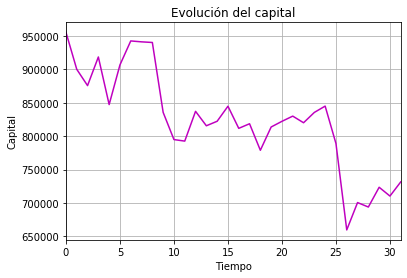

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
df_pasiva['Capital'].plot(color= 'm')
plt.xlabel('Tiempo')
plt.ylabel('Capital')
plt.title('Evolución del capital')
plt.grid()

<br>

# <font color= #6B6B6B> <font size = 6> 5. Conclusiones </font>

<hr style="border:0.02in solid gray"> </hr>

### <font color= #6B6B6B> <font size = 3> Desafortunadamente no se llego al resultado esperado ni a la comparativa necesaria para el proposito del proyecto. Pero es importante reiterar las ventajas de la inversión pasiva al cuidar el capital de perder el poder adquisitivo  y evitar el cobro constante de comisiones, pero la ventajas de gestionar una inversión activamente permiten hacer movimiento que den rendimientos mayores más allá de protección contra la inflación. </font>